# <center> **Ejemplo Kernel PCA** </center>
## <font size=4> **Aprendizaje Estadístico 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA, KernelPCA

## 1. Generar datos

In [2]:
X, y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True)
X = MinMaxScaler().fit_transform(X)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X.shape

(9298, 256)

In [4]:
y.shape

(9298,)

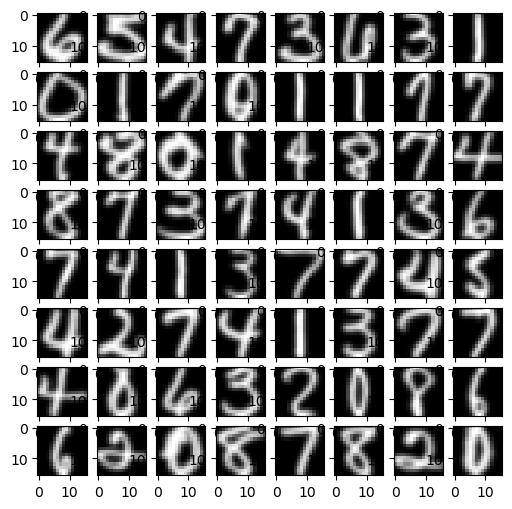

In [5]:
rows = 8
cols = 8

plt.figure(figsize=(6,6))
for i in range(0, rows):
    for j in range(0, cols):
        plt.subplot(rows, cols, cols*i + j + 1)
        plt.imshow(X[cols*i+j].reshape(16,16), cmap='gray')
        #plt.xlabel('Image {}'.format(cols*i+j))
plt.show()

In [6]:
seed = 2025

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=seed, train_size=1_000, test_size=100)

In [7]:
# Add noise
rng = np.random.RandomState(seed)

noise = rng.normal(scale=0.4, size=X_test.shape)
X_test_noisy = X_test + noise

noise = rng.normal(scale=0.4, size=X_train.shape)
X_train_noisy = X_train + noise

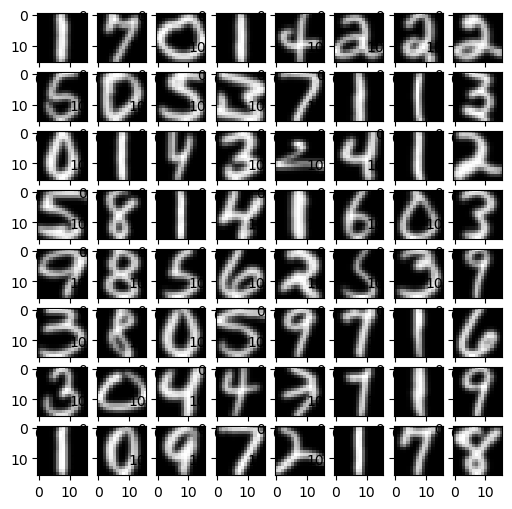

In [8]:
# Plot uncorrupted test images
rows = 8
cols = 8

plt.figure(figsize=(6,6))
for i in range(0, rows):
    for j in range(0, cols):
        plt.subplot(rows, cols, cols*i + j + 1)
        plt.imshow(X_test[cols*i+j].reshape(16,16), cmap='gray')
        #plt.xlabel('Image {}'.format(cols*i+j))
plt.show()

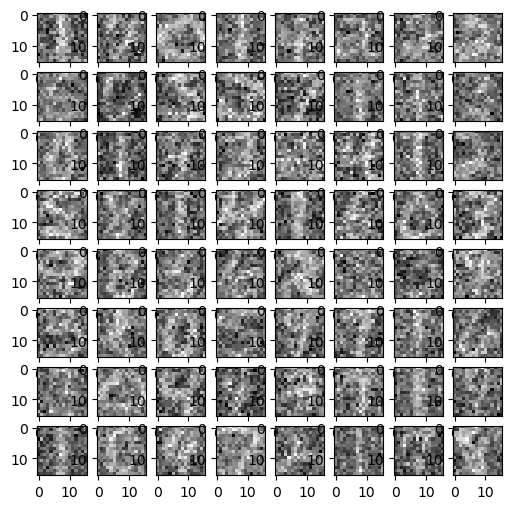

In [9]:
# Plot noisy test images
rows = 8
cols = 8

plt.figure(figsize=(6,6))
for i in range(0, rows):
    for j in range(0, cols):
        plt.subplot(rows, cols, cols*i + j + 1)
        plt.imshow(X_test_noisy[cols*i+j].reshape(16,16), cmap='gray')
        #plt.xlabel('Image {}'.format(cols*i+j))
plt.show()

### RBF Kernel

In [10]:
k1 = 32
k2 = 400

pca = PCA(n_components=k1, random_state=seed)
kernel_pca = KernelPCA(n_components=k2, kernel='rbf', gamma=1e-3, fit_inverse_transform=True, alpha=5e-3, random_state=seed)

#fit
pca.fit(X_train_noisy)
_ = kernel_pca.fit(X_train_noisy)

In [11]:
# Reconstruct Data

X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test_noisy))
X_reconstructed_pca        = pca.inverse_transform(pca.transform(X_test_noisy))

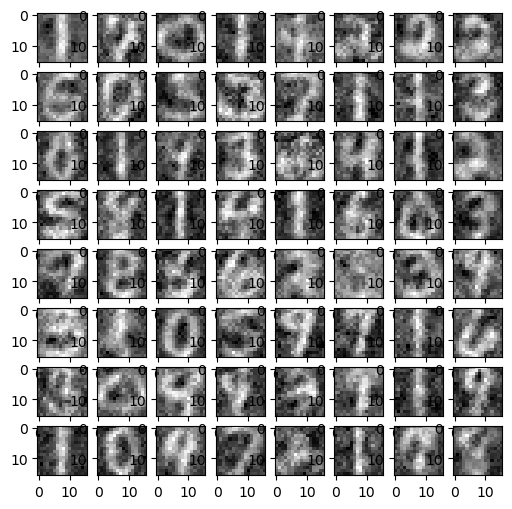

In [12]:
# PCA reconstruction
rows = 8
cols = 8

plt.figure(figsize=(6,6))
for i in range(0, rows):
    for j in range(0, cols):
        plt.subplot(rows, cols, cols*i + j + 1)
        plt.imshow(X_reconstructed_pca[cols*i+j].reshape(16,16), cmap='gray')
        #plt.xlabel('Image {}'.format(cols*i+j))
plt.show()

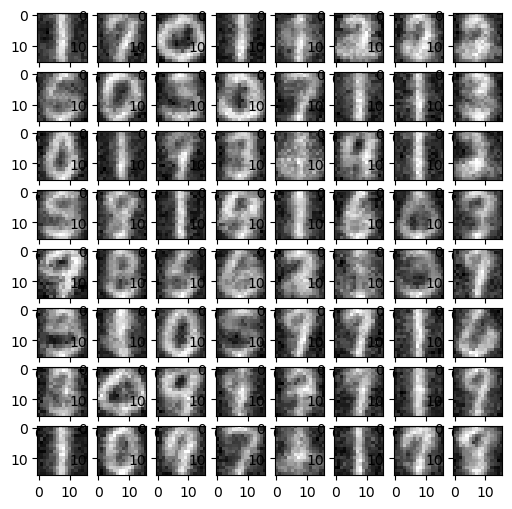

In [13]:
# Kernel PCA reconstruction
rows = 8
cols = 8

plt.figure(figsize=(6,6))
for i in range(0, rows):
    for j in range(0, cols):
        plt.subplot(rows, cols, cols*i + j + 1)
        plt.imshow(X_reconstructed_kernel_pca[cols*i+j].reshape(16,16), cmap='gray')
        #plt.xlabel('Image {}'.format(cols*i+j))
plt.show()